In [51]:
def isNumeric(x, ):
    
    if type(x) == str:
        x = x.strip()
        
        if not x.replace('.','').isdigit():
            raise "Invalid string, only numeric-values allowed as text."
        
        x = eval(x)

    if isinstance(x, float):
        if x.is_integer():
            return int(x)

        base, rem = str(x).split('.')

        if 0 < t < len(rem):
            return float(base+'.'+rem[:t])

In [33]:
import numpy as np

geo_df = np.load('countries_geo.npy', allow_pickle=True).item()['df']
nrows = geo_df.shape[0]

geo_df.iloc[nrows//2 - 3 : nrows//2 + 3] # Showing middle 6 rows

,iso_a3,polytype,geo
country,,,
Saint Kitts and Nevis,KNA,MultiPolygon,(POLYGON ((-62.54759680899988 17.1046410180001...
South Korea,KOR,MultiPolygon,(POLYGON ((126.8233663710002 33.55943982600012...
Kosovo,-99,Polygon,"POLYGON ((20.86470015400005 43.21733734200004,..."
Kuwait,KWT,MultiPolygon,(POLYGON ((48.38111412900017 29.43398672100004...
Laos,LAO,Polygon,"POLYGON ((101.8679211830001 22.37884185800007,..."
Lebanon,LBN,Polygon,"POLYGON ((36.39119429600009 34.62248728400007,..."


United Arab Emirates:



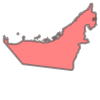

In [204]:
UAE = geo_df.loc['United Arab Emirates']

print(f'{UAE.name}:\n')
UAE.geo

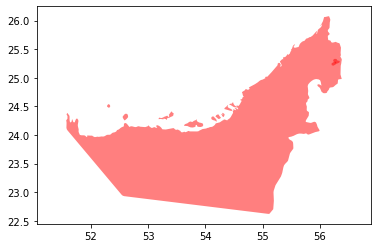

In [191]:
import shapely.ops as so
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in UAE.geo.geoms:    
    lngs_arr, lats_arr = geom.exterior.xy  # x = Longitude, y = Latitude
    axs.fill(lngs_arr, lats_arr, alpha=0.5, fc='r', ec='none')
    
#     lats, lngs_x = zip(*map(list, zip(lats_arr, lngs_arr)))

    
#     coords_UAE.append([lats, lngs])
#     coords_UAE.append(*coordinates)
#     coords_UAE.append(np.concatenate((lat, lng))) # Collect all UAE Coordinates
# plt.scatter(minmax_lats, minmax_lngs)
# axs[1].scatter(border_square['x'], border_square['y'], marker='o', color='r', label='point')

# # Plotting the square-coords on the UAE border plot
# for coords in border_square_coords:
#     plt.plot(*coords) #,'(%g,%g)'%coords
plt.show()

In [197]:
minmax_latlng = sorted(
                        sorted([x,y]) for x in UAE.geo.bounds for y in UAE.geo.bounds 
                                                if x != y and str(x)[0] == str(y)[0]
                       )[::2]
print(f'Min/Max boundary-points of {UAE.name}:\nLatitudes: {minmax_lats}\nLongitudes: {minmax_lngs}')

minmax_lat, minmax_lng = minmax_latlng

square_lats = np.arange(*minmax_lats, trimmer)
square_lngs = np.arange(*minmax_lngs, trimmer)

UAE_square_boundary = np.array(np.meshgrid(square_lats, square_lngs)).T.reshape(-1, 2)

print(f"\n{UAE.name}'s square-boundary coordinates:\n", UAE_square_boundary)
# geo_UAE.bounds.apply(lambda row: box(row.minx, row.miny, row.maxx, row.maxy), axis=1)

Min/Max boundary-points of United Arab Emirates:
Latitudes: [22.62094594300011, 26.074791972000142]
Longitudes: [51.56934655000006, 56.383636915000096]

United Arab Emirates's square-boundary coordinates:
 [[22.62094594 51.56934655]
 [22.62094594 51.57034655]
 [22.62094594 51.57134655]
 ...
 [26.07394594 56.38134655]
 [26.07394594 56.38234655]
 [26.07394594 56.38334655]]


In [210]:
from shapely.geometry import Point

ncoords = 0
for coords in UAE_square_boundary:
    coordinate = Point(coords[::-1])
    
    if coordinate.within(UAE.geo):
        ncoords+=1
        
print(ncoords,f'coordinates in {UAE.name}')

# To be continued

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

KeyboardInterrupt: 

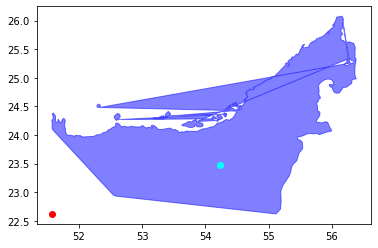

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

vts = np.array(polygon_allCoords)
pgon = patches.Polygon(vts, color="blue", alpha=0.5)

# 2 points defining a box
point1 = (51.57,22.62)
point2 = (54.2352365,23.4677)

# plot the polygon patch
fig,ax = plt.subplots()
ax.add_patch(pgon)

# plot points
ax.scatter(point1[0],point1[1], color="red", zorder=6)   # point1 inside
ax.scatter(point2[0],point2[1], color="aqua", zorder=6) # point2 outside

plt.show()

In [13]:
allUAE_square_coords

array([[51.568, 22.62 ],
       [51.568, 22.621],
       [51.568, 22.622],
       ...,
       [56.384, 26.073],
       [56.384, 26.074],
       [56.384, 26.075]])

In [14]:
# Check if the square-border points are inside the above UAE-polygon (inside blue)
pts_inside = pgon.contains_points(ax.transData.transform(allUAE_square_coords))

print(pts_inside) # [True False ...] output

[False False False ... False False False]


In [20]:
total_inpoints = sum(pts_inside)
f'{numstr(total_inpoints)} coordinates are inside the blue UAE-polygon (out of full plot of {numstr(len(allUAE_square_coords))} points)... {total_inpoints/len(allUAE_square_coords)*100}% of the plot.'

'6,590,119 coordinates are inside the blue UAE-polygon (out of full plot of 16,647,552 points)... 39.58611452302417% of the plot.'

In [22]:
actual_uae_coords = allUAE_square_coords[np.where(pts_inside)]
np.save('actual_uae_coords', actual_uae_coords, allow_pickle = True)

In [29]:
actual_uae_coords

array([[51.578, 24.253],
       [51.579, 24.247],
       [51.579, 24.248],
       ...,
       [56.375, 25.32 ],
       [56.375, 25.321],
       [56.375, 25.324]])